In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import ROOT

ar_data_path = 'Ar40_tot_xsec.txt'
min_energy = 1000 #eV

def extract_xsec(file_path):
    e_arr = []
    xsec_arr = []
    with open(file_path, 'r') as text_file:
        for line in text_file:
            values = line.split()
            if values[0] == '#E,eV':
                continue
            if values[0] == '#END':
                break
            if float(values[0]) < min_energy:
                continue
            e_arr.append(float(values[0]))
            xsec_arr.append(float(values[1]))

    return e_arr, xsec_arr

# Read CSV file into a DataFrame
data_1 = pd.read_csv('/home/yash/Downloads/13501002.csv')  
data_2 = pd.read_csv('/home/yash/Downloads/13501003.csv')  
data_3 = pd.read_csv('/home/yash/Downloads/14573002.csv')

# Extract x and y values from the DataFrame
x_values_1 = data_1['EN (EV) 1.1']  
y_values_1 = data_1['DATA (B) 0.1']
y_err_1 = data_1['DATA-ERR (B) 0.911']

x_values_2 = data_2['EN (EV) 1.1']  
y_values_2 = data_2['DATA (B) 0.1']
y_err_2 = data_2['DATA-ERR (B) 0.911']

x_min_3 = data_3['EN-MIN (EV) 1.2']  
x_max_3 = data_3['EN-MAX (EV) 1.3']
bin_centers_3 = (x_min_3+x_max_3)/2
x_err_3 = bin_centers_3 - x_min_3
y_values_3 = data_3['DATA (B) 0.1']
y_err_3 = data_3['DATA-ERR (B) 0.911']

# below x values are in MeV
x_values_4 = np.array([143, 236, 319, 404, 543])
x_min_4 = np.array([95, 174, 265, 325, 420])
x_max_4 = np.array([200, 315, 385, 515, 720])
x_err_4_low = x_values_4 - x_min_4
x_err_4_up = x_max_4 - x_values_4
x_err_4 = np.array([x_err_4_low, x_err_4_up])
y_values_4 = np.array([0.601, 0.722, 0.804, 0.739, 0.741])
y_err_4_low = np.array([0.143, 0.101, 0.121, 0.091, 0.088])
y_err_4_up = np.array([0.140, 0.103, 0.129, 0.135, 0.088])
y_err_4 = np.array([y_err_4_low, y_err_4_up])

#ARTIE data
artie_data = pd.read_csv('artie_published_data_20to70keV.csv')
x_artie = artie_data['Energy (keV)']
y_artie = artie_data['Cross Section (B)']
x_artie_err_low = artie_data['E err low (keV)']
x_artie_err_up = artie_data['E err high (keV)']
y_artie_err_low = artie_data['xsec err low (B)']
y_artie_err_up = artie_data['xsec err high (B)']
x_artie_err = np.array([x_artie_err_low, x_artie_err_up])
y_artie_err = np.array([y_artie_err_low, y_artie_err_up])

#endf
ar_e_arr, ar_xsec_arr = extract_xsec(ar_data_path)

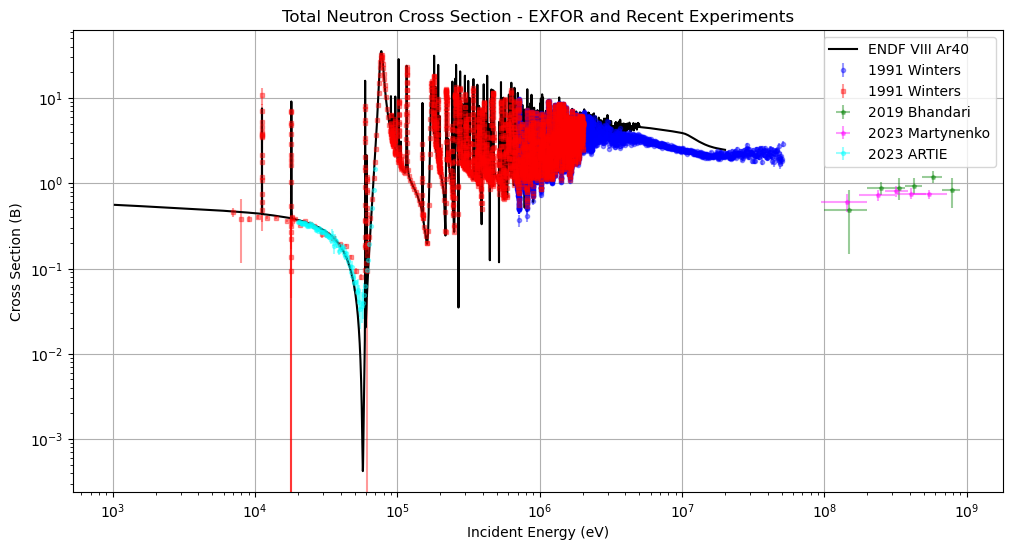

In [16]:
# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.errorbar(x_values_1, y_values_1, yerr=y_err_1, marker='o', markersize=3., linestyle = "", color='blue', alpha=0.4, label='1991 Winters') 
plt.errorbar(x_values_2, y_values_2, yerr=y_err_2, marker='s', markersize=3., linestyle = "", color='red', alpha=0.4, label='1991 Winters') 
plt.errorbar(bin_centers_3, y_values_3, xerr=x_err_3, yerr=y_err_3, marker='p', markersize=3., linestyle = "", color='green', alpha=0.4, label='2019 Bhandari') 
plt.errorbar(x_values_4*1e6, y_values_4, xerr=x_err_4*1e6, yerr=y_err_4, marker='p', markersize=3., linestyle = "", color='magenta', alpha=0.4, label='2023 Martynenko')
plt.errorbar(x_artie*1e3, y_artie, xerr=x_artie_err*1e3, yerr=y_artie_err, marker='8', markersize=3., linestyle = "", color='cyan', alpha=0.4, label='2023 ARTIE') 
plt.plot(ar_e_arr, ar_xsec_arr, linestyle = '-', color='black', label='ENDF VIII Ar40')
plt.title('Total Neutron Cross Section - EXFOR and Recent Experiments')
plt.xlabel('Incident Energy (eV)')
plt.ylabel('Cross Section (B)')
plt.grid(True)  # Add grid lines
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig("/home/yash/random_scripts/n_Ar_xsec.png", dpi=300)
plt.show()

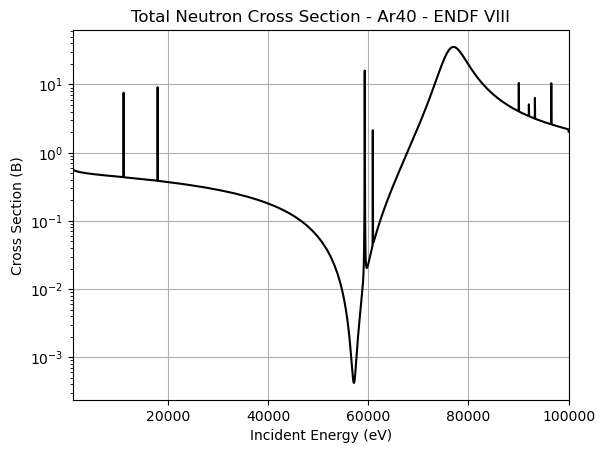

In [22]:
plt.plot(ar_e_arr, ar_xsec_arr, linestyle = '-', color='black', label='ENDF Ar40')
plt.xlim(1000, 100000)
plt.yscale('log')
# plt.xscale('log')
plt.title('Total Neutron Cross Section - Ar40 - ENDF VIII')
plt.xlabel('Incident Energy (eV)')
plt.ylabel('Cross Section (B)')
plt.grid(True)  # Add grid lines
plt.savefig("/home/yash/random_scripts/Ar_xsec_dip.png", dpi=300)
plt.show()
